# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

demo = pd.read_csv('./demo01_trat.csv')
demo.drop('Unnamed: 0', axis = 1, inplace = True)
demo.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [111]:
y = demo.mau

In [112]:
X = demo.drop('mau', axis = 1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [113]:
clf = DecisionTreeClassifier(random_state = 100)
clf

DecisionTreeClassifier(random_state=100)

In [114]:
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(random_state=100)

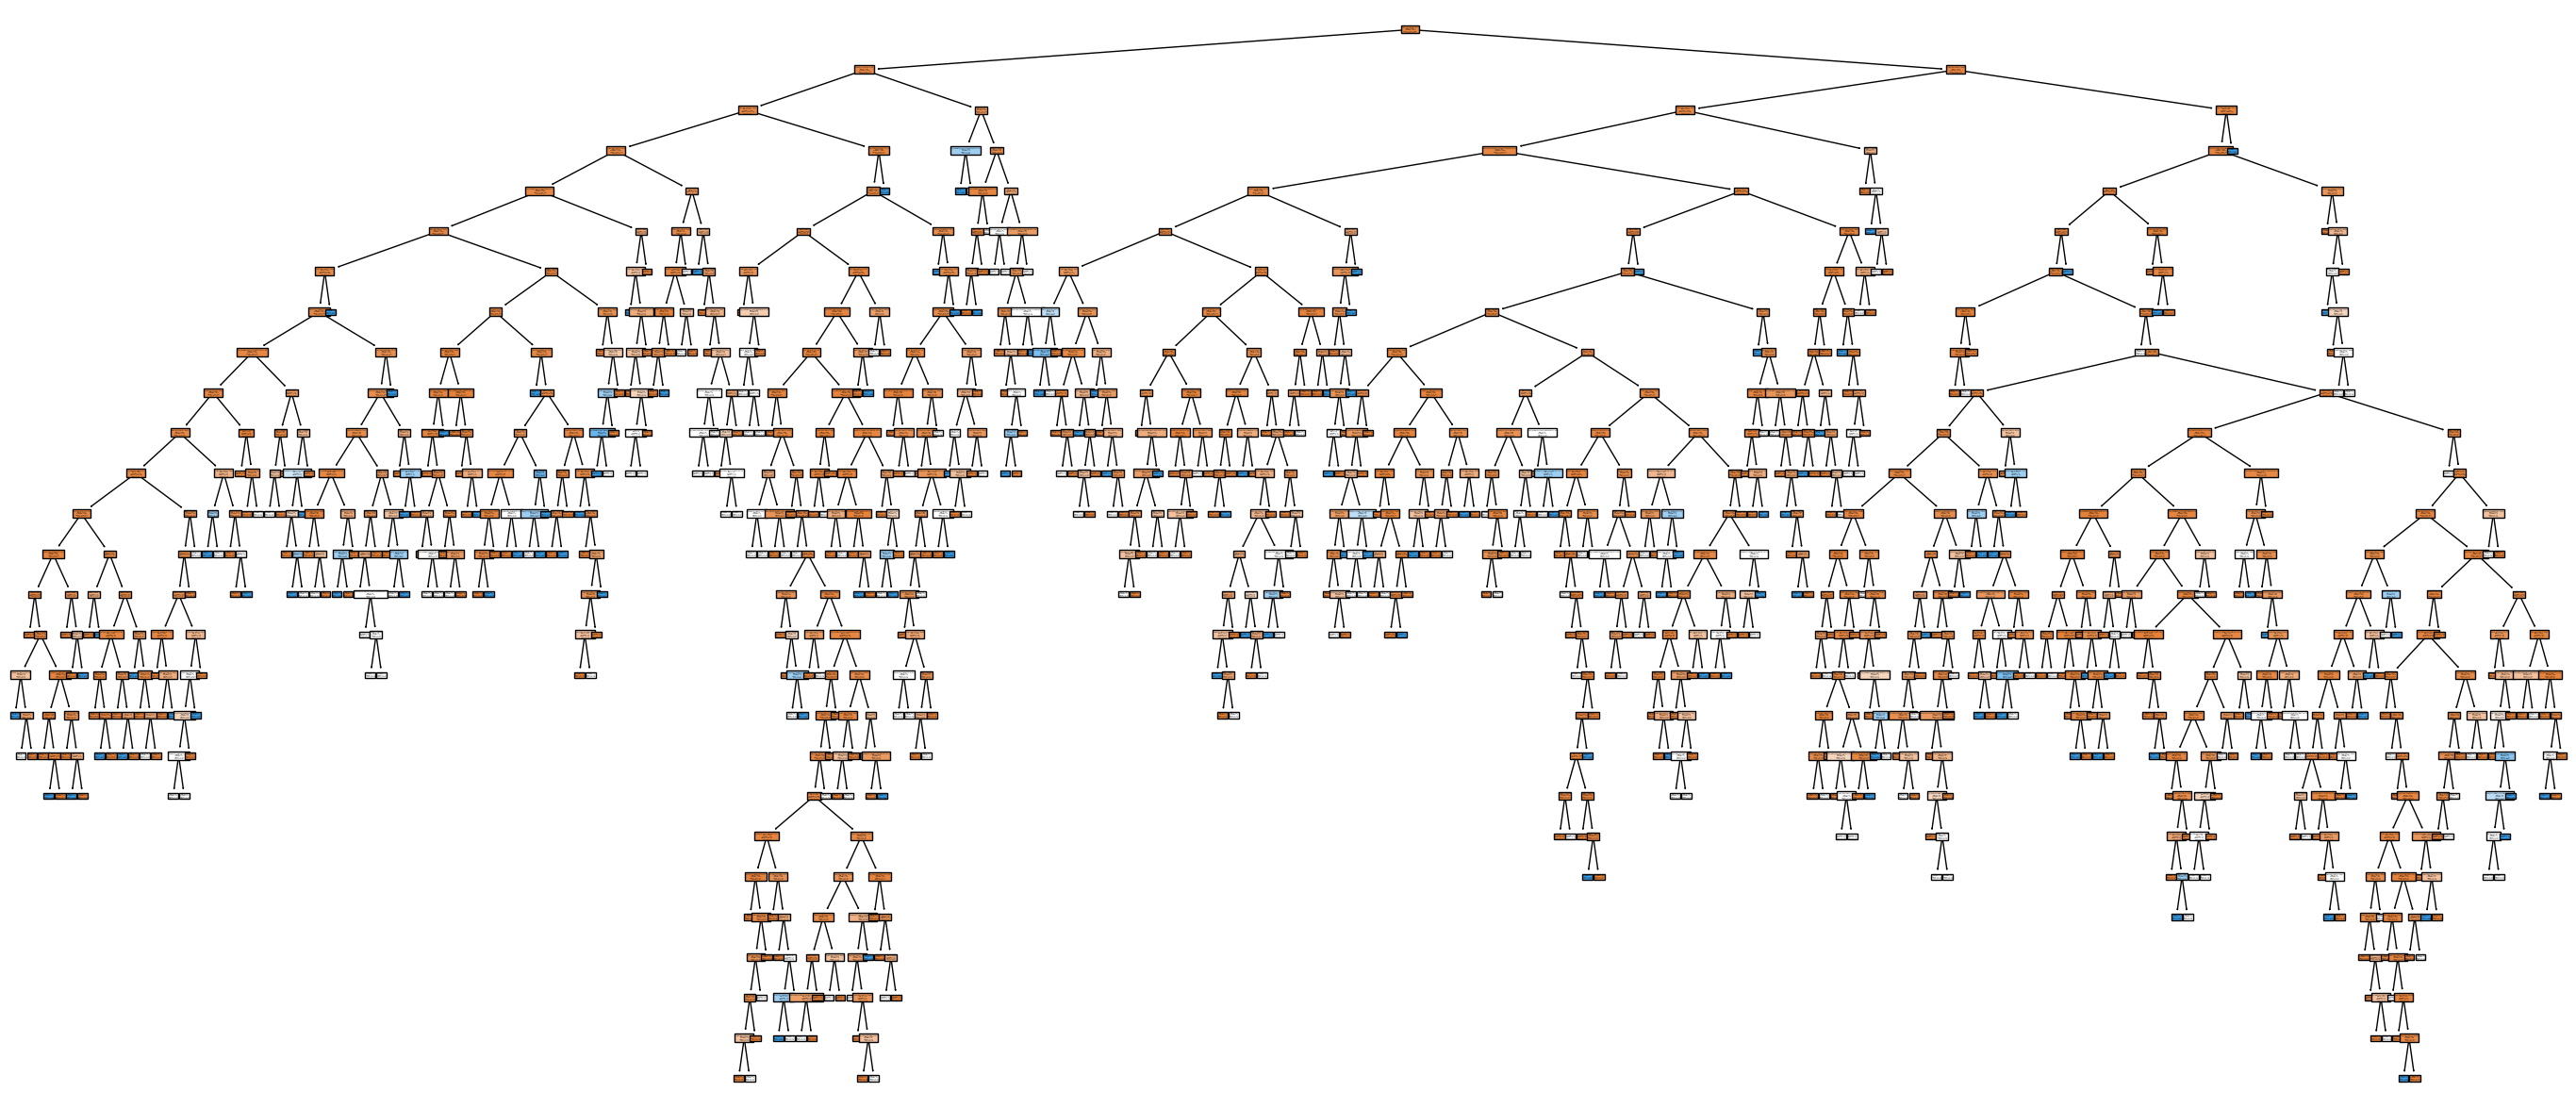

In [115]:
plt.figure(figsize = (35, 15))
plot_tree(clf, 
          filled = True, 
          class_names = ['bom', 'mau'], 
          feature_names = X.columns);

/Users/mariliabatista/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


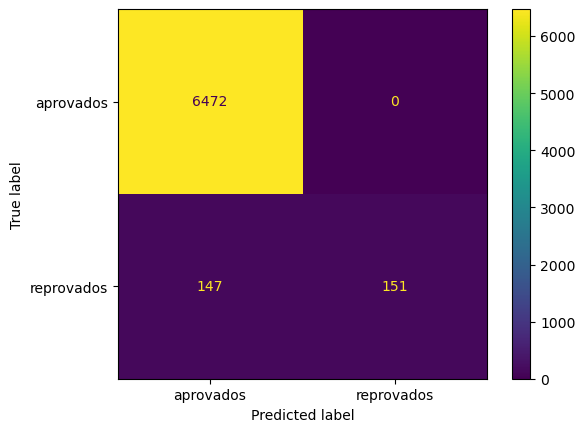

In [116]:
plot_confusion_matrix(clf, X, y, display_labels=['aprovados', 'reprovados']);

In [117]:
predict = clf.predict(X)

In [118]:
accuracy_score(y, predict)

0.9782865583456425

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [120]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_train, y_train)

In [121]:
y_hat_treino = clf.predict(X_train)

In [122]:
y_hat = clf.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

/Users/mariliabatista/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


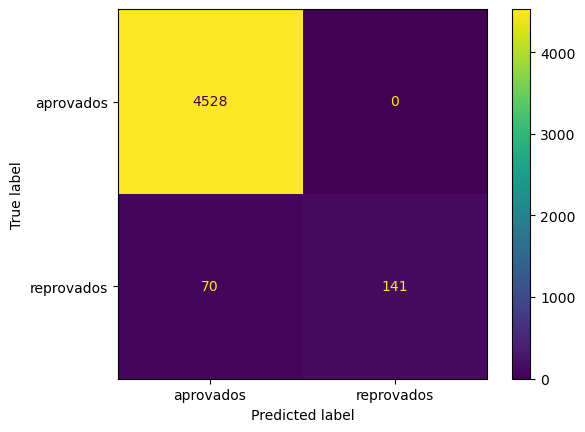

In [123]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [124]:
accuracy_score(y_train, y_hat_treino)

0.9852289512555391

/Users/mariliabatista/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


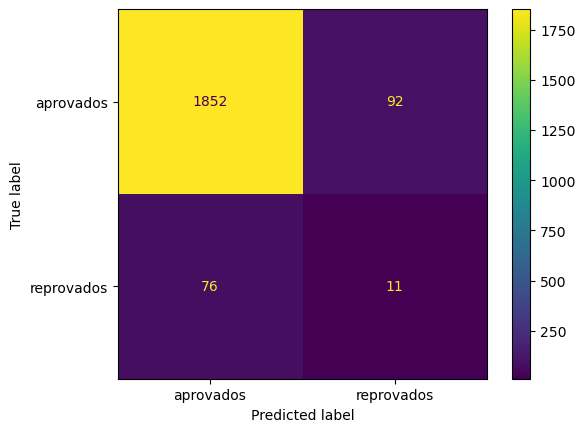

In [125]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [126]:
accuracy_score(y_test, y_hat)

0.9172821270310192

In [127]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9565309136948723

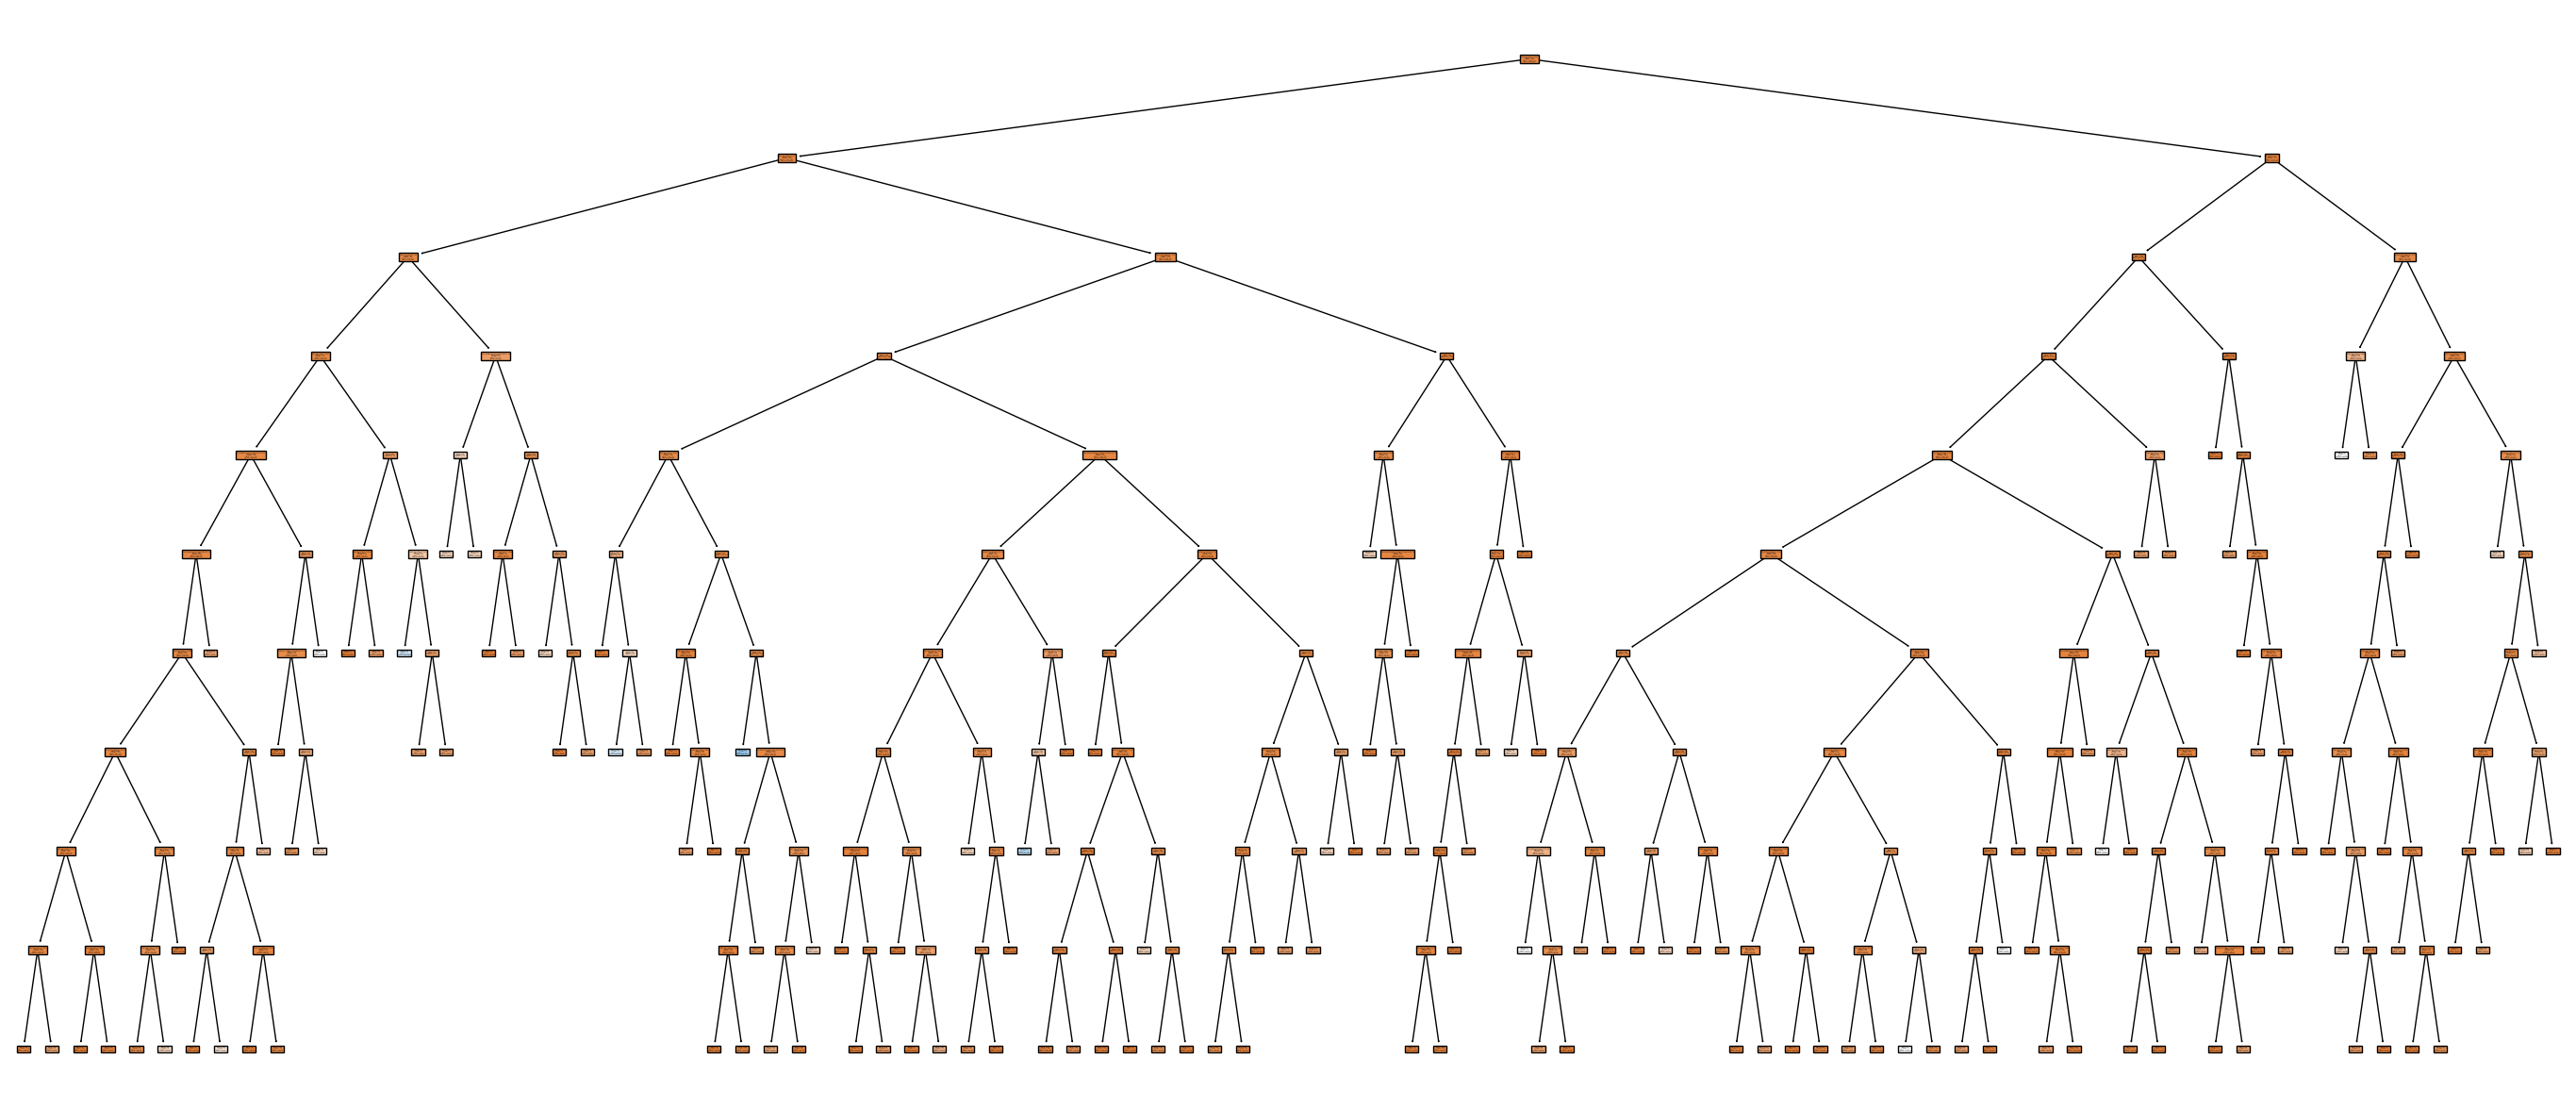

In [128]:
plt.figure(figsize = (35, 15))
plot_tree(clf, 
          filled = True, 
          class_names = ['aprovados', 'reprovados'], 
          feature_names = X_train.columns);

/Users/mariliabatista/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


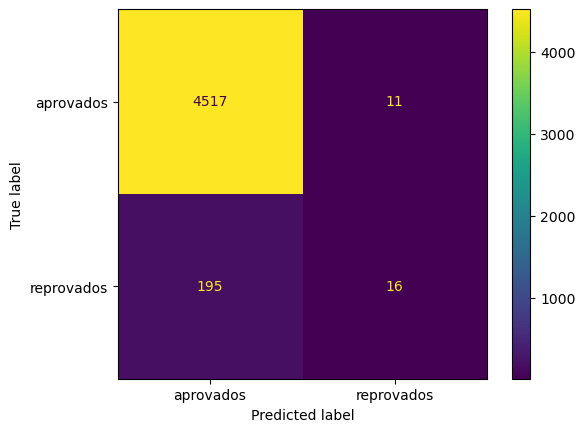

In [129]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [130]:
16/(16+195)

0.07582938388625593

In [131]:
y_bons = y_train.replace(1, 0)
accuracy_score(y_bons, predict)

0.9943025954842794

In [132]:
print(y_bons.value_counts())
print(y_train.value_counts())

0    4739
Name: mau, dtype: int64
0    4528
1     211
Name: mau, dtype: int64
